###Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
movies = pd.read_csv('/content/drive/MyDrive/STUDY2/DATA ANALYSIS LAB/LABCYCLE/DATASETS/movies _9thQuestion.csv')
movies

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765,36851125,21240321.0,24000000.0,31-Oct-08,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084,83080084,20983030.0,85000000.0,2-Mar-07,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328,12506188,6679409.0,35000000.0,11-Aug-06,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336,141475336,NaN,80000000.0,28-Oct-05,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


###Cleaning

In [4]:
movies = movies.dropna(subset=['Title', 'US Gross', 'Worldwide Gross', 'Release Date', 'MPAA Rating','Distributor', 'Source', 'Major Genre',
                               'Creative Type', 'Director',])

In [5]:
def modify_release_year(year):
    if year > 23:
        return 1900 + year
    else:
        return 2000 + year

movies['Release Year'] = movies['Release Date'].apply(lambda x: x.split('-')[2].strip())

num_cols=['US DVD Sales','US Gross','Production Budget','Running Time (min)', 'Rotten Tomatoes Rating', 'IMDB Rating','IMDB Votes','Worldwide Gross','Release Year']
for num in num_cols:
    movies[num].fillna(movies[num].mean(),inplace=True)
    movies[num] = movies[num].astype(int)

movies['Release Year'] = movies['Release Year'].apply(modify_release_year)
movies

<ipython-input-5-6ef33899a93e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Release Year'] = movies['Release Date'].apply(lambda x: x.split('-')[2].strip())
<ipython-input-5-6ef33899a93e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[num].fillna(movies[num].mean(),inplace=True)
<ipython-input-5-6ef33899a93e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release Year
20,Twelve Monkeys,57141459,168841459,42195480,29000000,27-Dec-95,R,114,Universal,Based on Short Film,Drama,Science Fiction,Terry Gilliam,55,8,169858,1995
28,Twin Falls Idaho,985341,1027228,42195480,500000,30-Jul-99,R,114,Sony Pictures Classics,Original Screenplay,Drama,Contemporary Fiction,Michael Polish,77,7,2810,1999
34,Four Rooms,4301000,4301000,42195480,4000000,25-Dec-95,R,114,Miramax,Original Screenplay,Comedy,Contemporary Fiction,Robert Rodriguez,14,6,34328,1995
36,Four Weddings and a Funeral,52700832,242895809,42195480,4500000,9-Mar-94,R,114,Gramercy,Original Screenplay,Romantic Comedy,Contemporary Fiction,Mike Newell,96,7,39003,1994
41,The Abyss,54243125,54243125,42195480,70000000,9-Aug-89,PG-13,114,20th Century Fox,Original Screenplay,Action,Science Fiction,James Cameron,88,7,51018,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765,36851125,21240321,24000000,31-Oct-08,R,101,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65,7,55687,2008
3197,Zodiac,33080084,83080084,20983030,85000000,2-Mar-07,R,157,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89,6,45158,2007
3198,Zoom,11989328,12506188,6679409,35000000,11-Aug-06,PG,114,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3,3,7424,2006
3199,The Legend of Zorro,45575336,141475336,42195480,80000000,28-Oct-05,PG,129,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26,5,21161,2005


###a. Find number of movies released under each genre in each year.


In [6]:
movies_in_genre = movies.groupby(['Release Year','Major Genre'])['Title'].nunique()
movies_in_genre.reset_index()

,Release Year,Major Genre,Title
0,1939,Drama,1
1,1939,Musical,1
2,1960,Western,1
3,1965,Drama,1
4,1969,Western,1
...,...,...,...
199,2010,Comedy,5
200,2010,Drama,8
201,2010,Horror,2
202,2010,Romantic Comedy,1


###b. Find movies with loss every year for each distributor.


In [12]:
loss = movies[movies['Production Budget'] > movies['Worldwide Gross']]
loss
film_loss = loss.groupby(['Release Year','Distributor','Title']).agg(list).reset_index()
film_loss.pivot_table(index=['Release Year','Distributor','Title'])

<ipython-input-12-d9d7667805c1>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  film_loss.pivot_table(index=['Release Year','Distributor','Title'])


Empty DataFrame
Columns: []
Index: [(1960, United Artists, The Alamo), (1980, Universal, The Island), (1985, Universal, Brazil), (1986, 20th Century Fox, Highlander), (1989, 20th Century Fox, The Abyss), (1994, 20th Century Fox, Baby's Day Out), (1994, Savoy, Serial Mom), (1994, Universal, Crooklyn), (1994, Universal, The Shadow), (1994, Walt Disney Pictures, Ed Wood), (1994, Walt Disney Pictures, Renaissance Man), (1994, Warner Bros., On Deadly Ground), (1994, Warner Bros., Ri¢hie Ri¢h), (1994, Warner Bros., Wyatt Earp), (1995, 20th Century Fox, Kiss of Death), (1995, Goldwyn Entertainment, The Perez Family), (1995, Gramercy, Mallrats), (1995, MGM, Cutthroat Island), (1995, MGM, Showgirls), (1995, Paramount Pictures, Jade), (1995, Paramount Pictures, The Indian in the Cupboard), (1995, Sony Pictures, The Quick and the Dead), (1995, Walt Disney Pictures, Jefferson in Paris), (1995, Walt Disney Pictures, Nixon), (1995, Walt Disney Pictures, The Scarlet Letter), (1996, Fine Line, Crash), (1996, Fox Searchlight, Girl 6), (1996, MGM, Unforgettable), (1996, Miramax, Basquiat), (1996, Miramax, The Pallbearer), (1996, New Line, Faithful), (1996, New Line, Kansas City), (1996, New Line, Last Man Standing), (1996, New Line, The Island of Dr. Moreau), (1996, New Line, The Long Kiss Goodnight), (1996, October Films, The Funeral), (1996, Paramount Pictures, Escape from L.A.), (1996, Paramount Pictures, The Ghost and the Darkness), (1996, Paramount Pictures, The Phantom), (1996, Sony Pictures, City Hall), (1996, Sony Pictures, Extreme Measures), (1996, Sony Pictures, Ghosts of Mississippi), (1996, Sony Pictures, Mary Reilly), (1996, Sony Pictures, Mrs. Winterbourne), (1996, Sony Pictures, Multiplicity), (1996, Sony Pictures, Striptease), (1996, Sony Pictures, The Fan), (1996, Sony Pictures, The Mirror Has Two Faces), (1996, Walt Disney Pictures, White Squall), (1996, Warner Bros., Bogus), (1997, Fine Line, Deconstructing Harry), (1997, Fine Line, The Sweet Hereafter), (1997, Fox Searchlight, Blood and Wine), (1997, Fox Searchlight, Smilla's Sense of Snow), (1997, Fox Searchlight, The Ice Storm), (1997, MGM, Warriors of Virtue), (1997, Paramount Pictures, Event Horizon), (1997, Paramount Pictures, The Relic), (1997, Polygram, The Game), (1997, Sony Pictures, Gattaca), (1997, Sony Pictures Classics, Waiting for Guffman), (1997, Universal, A Simple Wish), (1997, Walt Disney Pictures, G.I.Jane), (1997, Walt Disney Pictures, Kundun), (1997, Walt Disney Pictures, Shadow Conspiracy), (1997, Warner Bros., Cats Don't Dance), (1997, Warner Bros., Father's Day), (1997, Warner Bros., Mad City), (1997, Warner Bros., Midnight in the Garden of Good and Evil), (1997, Warner Bros., The Man Who Knew Too Little), (1997, Warner Bros., The Postman), (1998, 20th Century Fox, Bulworth), (1998, 20th Century Fox, The Newton Boys), (1998, 20th Century Fox, The Thin Red Line), (1998, MGM, Lolita), (1998, MGM, Ronin), (1998, Miramax, Celebrity), (1998, October Films, Orgazmo), (1998, Paramount Pictures, A Simple Plan), (1998, Sony Pictures, The Replacement Killers), (1998, Universal, Babe: Pig in the City), (1998, Universal, Fear and Loathing in Las Vegas), (1998, Universal, Meet Joe Black), (1998, Universal, Mercury Rising), (1998, Universal, One True Thing), (1998, Universal, Out of Sight), (1998, Universal, Primary Colors), (1998, Walt Disney Pictures, A Civil Action), (1998, Walt Disney Pictures, Beloved), (1998, Walt Disney Pictures, Deep Rising), (1998, Walt Disney Pictures, He Got Game), (1998, Walt Disney Pictures, Holy Man), (1998, Walt Disney Pictures, Simon Birch), (1998, Warner Bros., Soldier), (1998, Warner Bros., Sphere), (1998, Warner Bros., The Negotiator), (1999, 20th Century Fox, Anna and the King), (1999, 20th Century Fox, Anywhere But Here), (1999, 20th Century Fox, Pushing Tin), (1999, Artisan, Felicia's Journey), ...]

[398 rows x 0 columns]

###c. Find the Directors who directed for each creative type with IMDB rating above 6.

In [14]:
imdb_6 = movies[movies['IMDB Rating']>6]
#imdb_6
dir_6 = movies.groupby(['Director','Creative Type'])['IMDB Rating'].mean().reset_index()
dir_6 = dir_6.rename(columns={'IMDB Rating':'AVG_IMDB_RATING'})
dir_6.pivot_table(index=['Director','Creative Type'])

AVG_IMDB_RATING
Director      Creative Type                        
Abel Ferrara  Historical Fiction                6.0
Adam McKay    Contemporary Fiction              6.0
              Historical Fiction                7.0
Adam Shankman Contemporary Fiction              5.2
              Historical Fiction                7.0
...                                             ...
Zach Braff    Contemporary Fiction              7.0
Zack Snyder   Historical Fiction                7.0
              Science Fiction                   7.0
              Super Hero                        7.0
Zak Penn      Contemporary Fiction              6.0

[828 rows x 1 columns]

###d. Draw the plot to compare the number of movies released till now by each director.


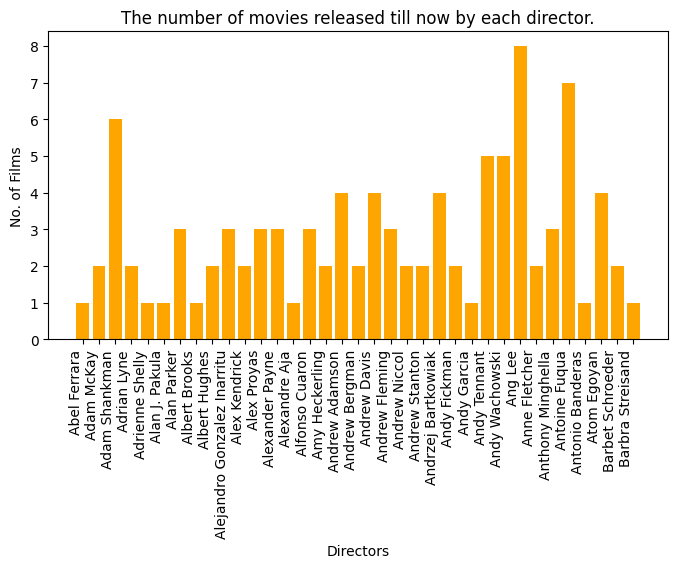

In [ ]:
no_of_films = movies.groupby(['Director'])['Title'].nunique().reset_index()
no_of_films = no_of_films.head(35)
plt.figure(figsize=(8,4))
plt.bar(no_of_films['Director'],no_of_films['Title'],color='orange')
plt.xlabel('Directors')
plt.ylabel('No. of Films')
plt.title('The number of movies released till now by each director.')
plt.xticks(rotation=90, ha='right')
plt.show()

###e. Find the genres of the movies released in each year in the ascending order.


In [ ]:
sorted_movies = movies.sort_values(by=['Release Year','Major Genre'])
movie_genres = sorted_movies.groupby(['Release Year','Major Genre']).agg(list).reset_index()
#movie_genres[['Release Year','Major Genre']]
pivot_table = movie_genres.pivot_table(index=['Release Year','Major Genre'])
pivot_table

<ipython-input-269-db6305ed14a4>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = movie_genres.pivot_table(index=['Release Year','Major Genre'])


Empty DataFrame
Columns: []
Index: [(1939, Drama), (1939, Musical), (1960, Western), (1965, Drama), (1969, Western), (1973, Horror), (1975, Horror), (1977, Adventure), (1978, Adventure), (1978, Musical), (1979, Action), (1979, Adventure), (1979, Horror), (1980, Adventure), (1980, Drama), (1981, Adventure), (1981, Comedy), (1982, Action), (1982, Drama), (1982, Thriller/Suspense), (1983, Adventure), (1983, Drama), (1984, Comedy), (1984, Drama), (1985, Action), (1985, Black Comedy), (1986, Action), (1987, Action), (1987, Drama), (1989, Action), (1990, Comedy), (1990, Thriller/Suspense), (1991, Action), (1991, Adventure), (1991, Drama), (1991, Musical), (1991, Thriller/Suspense), (1992, Action), (1992, Black Comedy), (1992, Comedy), (1992, Drama), (1992, Horror), (1993, Action), (1993, Adventure), (1993, Comedy), (1993, Drama), (1993, Thriller/Suspense), (1993, Western), (1994, Action), (1994, Adventure), (1994, Comedy), (1994, Drama), (1994, Horror), (1994, Romantic Comedy), (1994, Thriller/Suspense), (1994, Western), (1995, Action), (1995, Adventure), (1995, Black Comedy), (1995, Comedy), (1995, Drama), (1995, Horror), (1995, Romantic Comedy), (1995, Thriller/Suspense), (1995, Western), (1996, Action), (1996, Adventure), (1996, Black Comedy), (1996, Comedy), (1996, Drama), (1996, Horror), (1996, Musical), (1996, Romantic Comedy), (1996, Thriller/Suspense), (1997, Action), (1997, Adventure), (1997, Comedy), (1997, Drama), (1997, Horror), (1997, Musical), (1997, Romantic Comedy), (1997, Thriller/Suspense), (1998, Action), (1998, Adventure), (1998, Black Comedy), (1998, Comedy), (1998, Drama), (1998, Horror), (1998, Romantic Comedy), (1998, Thriller/Suspense), (1999, Action), (1999, Adventure), (1999, Black Comedy), (1999, Comedy), (1999, Drama), (1999, Horror), (1999, Musical), (1999, Romantic Comedy), (1999, Thriller/Suspense), (1999, Western), ...]

[204 rows x 0 columns]

###f. Find the budgets of the movies released by each distributor along with movie names.

In [ ]:
movie_budget = movies.groupby(['Distributor','Title','Production Budget']).agg(list).reset_index()
movie_budget.pivot_table(index=['Distributor','Title', 'Production Budget'])

<ipython-input-270-1da8bcc3ee6b>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  movie_budget.pivot_table(index=['Distributor','Title', 'Production Budget'])


Empty DataFrame
Columns: []
Index: [(20th Century Fox, 12 Rounds, 20000000), (20th Century Fox, A Good Year, 35000000), (20th Century Fox, AVP: Alien Vs. Predator, 70000000), (20th Century Fox, Alien, 9000000), (20th Century Fox, Alien: Resurrection, 60000000), (20th Century Fox, Aliens, 17000000), (20th Century Fox, Alien³, 55000000), (20th Century Fox, Alvin and the Chipmunks, 55000000), (20th Century Fox, Anastasia, 53000000), (20th Century Fox, Anna and the King, 75000000), (20th Century Fox, Anywhere But Here, 23000000), (20th Century Fox, Australia, 78000000), (20th Century Fox, Avatar, 237000000), (20th Century Fox, Baby's Day Out, 50000000), (20th Century Fox, Babylon A.D., 45000000), (20th Century Fox, Because of Winn-Dixie, 15000000), (20th Century Fox, Bedazzled, 48000000), (20th Century Fox, Big Momma's House, 33000000), (20th Century Fox, Borat, 18000000), (20th Century Fox, Broken Arrow, 65000000), (20th Century Fox, Bulworth, 30000000), (20th Century Fox, Cast Away, 85000000), (20th Century Fox, Chain Reaction, 55000000), (20th Century Fox, Cheaper by the Dozen, 40000000), (20th Century Fox, Cheaper by the Dozen 2, 60000000), (20th Century Fox, City of Ember, 38000000), (20th Century Fox, Courage Under Fire, 46000000), (20th Century Fox, Daredevil, 80000000), (20th Century Fox, Date Movie, 20000000), (20th Century Fox, Date Night, 55000000), (20th Century Fox, Die Hard: With a Vengeance, 90000000), (20th Century Fox, Doctor Dolittle, 71500000), (20th Century Fox, Doctor Dolittle 2, 72000000), (20th Century Fox, Drive Me Crazy, 8000000), (20th Century Fox, Entrapment, 66000000), (20th Century Fox, Epic Movie, 20000000), (20th Century Fox, Ever After: A Cinderella Story, 26000000), (20th Century Fox, Fantastic Four, 87500000), (20th Century Fox, Fantastic Four: Rise of the Silver Surfer, 120000000), (20th Century Fox, Fat Albert, 45000000), (20th Century Fox, Fever Pitch, 40000000), (20th Century Fox, Fight Club, 65000000), (20th Century Fox, First Daughter, 30000000), (20th Century Fox, From Hell, 35000000), (20th Century Fox, Garfield, 50000000), (20th Century Fox, Glitter, 8500000), (20th Century Fox, High Crimes, 42000000), (20th Century Fox, Highlander, 16000000), (20th Century Fox, Home Alone, 15000000), (20th Century Fox, Home Alone 2: Lost in New York, 20000000), (20th Century Fox, Hope Floats, 30000000), (20th Century Fox, I Love You, Beth Cooper, 18000000), (20th Century Fox, I, Robot, 105000000), (20th Century Fox, Ice Age, 65000000), (20th Century Fox, Ice Age: Dawn of the Dinosaurs, 90000000), (20th Century Fox, Ice Age: The Meltdown, 75000000), (20th Century Fox, Independence Day, 75000000), (20th Century Fox, Jingle All the Way, 60000000), (20th Century Fox, Joe Somebody, 38000000), (20th Century Fox, Joy Ride, 23000000), (20th Century Fox, Jumper, 82500000), (20th Century Fox, Just Married, 19000000), (20th Century Fox, Just My Luck, 28000000), (20th Century Fox, Kingdom of Heaven, 110000000), (20th Century Fox, Kiss of Death, 40000000), (20th Century Fox, Kiss of the Dragon, 25000000), (20th Century Fox, Knight and Day, 117000000), (20th Century Fox, Kung Pow: Enter the Fist, 10000000), (20th Century Fox, Lake Placid, 27000000), (20th Century Fox, Life, or Something Like It, 40000000), (20th Century Fox, Like Mike, 30000000), (20th Century Fox, Live Free or Die Hard, 110000000), (20th Century Fox, Man on Fire, 60000000), (20th Century Fox, Master and Commander: The Far Side of the World, 135000000), (20th Century Fox, Me, Myself & Irene, 51000000), (20th Century Fox, Meet Dave, 60000000), (20th Century Fox, Meet the Spartans, 30000000), (20th Century Fox, Minority Report, 102000000), (20th Century Fox, Moulin Rouge, 53000000), (20th Century Fox, Mr. And Mrs. Smith, 110000000), (20th Century Fox, Mrs. Doubtfire, 25000000), (20th Century Fox, Night at the Museum, 110000000), (20th Century Fox, Night at the Museum: Battle of the Smithsonian, 150000000), (20th Century Fox, Percy Jackson & the Olympian

###g. Find the movies with the same IMDB rating but with different no.of IMDB votes.

In [ ]:
ratings = movies.groupby(['IMDB Rating','IMDB Votes','Title']).agg(list).reset_index()
ratings.pivot_table(index=['IMDB Rating','IMDB Votes','Title'])

<ipython-input-271-e717066823c6>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  ratings.pivot_table(index=['IMDB Rating','IMDB Votes','Title'])


Empty DataFrame
Columns: []
Index: [(1, 34928, Disaster Movie), (2, 212, Closer), (2, 217, Scream), (2, 3449, Marci X), (2, 3458, Furry Vengeance), (2, 4175, Speed), (2, 5012, The Honeymooners), (2, 13778, Glitter), (2, 13827, Rollerball), (2, 20137, BloodRayne), (2, 26028, Alone in the Dark), (2, 29031, Gigli), (2, 31821, Date Movie), (2, 47281, Meet the Spartans), (2, 48975, Epic Movie), (3, 77, Heist), (3, 124, Alive), (3, 354, Beauty and the Beast), (3, 479, Milk), (3, 1113, The Calling), (3, 2251, King's Ransom), (3, 3215, Pinocchio), (3, 3362, Meet the Browns), (3, 4628, Dudley Do-Right), (3, 5002, Dance Flick), (3, 5369, Madea's Family Reunion), (3, 5468, Madea Goes To Jail), (3, 5491, The Flintstones in Viva Rock Vegas), (3, 5619, The Adventures of Sharkboy and Lavagirl in 3-D), (3, 7424, Zoom), (3, 7665, Swept Away), (3, 9579, On Deadly Ground), (3, 11438, FearDotCom), (3, 15760, The Fog), (3, 16784, Basic Instinct 2), (3, 18012, Striptease), (3, 30896, Speed II: Cruise Control), (3, 81283, Batman & Robin), (4, 48, Big Daddy), (4, 48, Six Days, Seven Nights), (4, 83, Twisted), (4, 101, Bubble), (4, 129, Superman), (4, 151, Out of Time), (4, 165, Hardball), (4, 189, Mr. And Mrs. Smith), (4, 229, The Beach), (4, 288, Volver), (4, 310, Ghost Town), (4, 1125, Taken), (4, 1169, The Forgotton), (4, 1202, Warriors of Virtue), (4, 1426, Isn't She Great), (4, 1545, A Simple Wish), (4, 2184, Boot, Das), (4, 2238, Beautiful), (4, 2427, Shadow Conspiracy), (4, 2726, Gloria), (4, 2742, Bogus), (4, 2889, Town & Country), (4, 3195, Extreme Ops), (4, 3348, Girl 6), (4, 3432, Man of the House), (4, 4166, The Pallbearer), (4, 4485, Rebound), (4, 4698, Air Bud), (4, 4801, Fat Albert), (4, 4870, Like Mike), (4, 4918, My Favorite Martian), (4, 5277, Code Name: The Cleaner), (4, 5279, Jade), (4, 5397, Thunderbirds), (4, 5461, Lucky Numbers), (4, 5700, Welcome Home Roscoe Jenkins), (4, 6000, An American Carol), (4, 6104, The Next Best Thing), (4, 6116, The Shaggy Dog), (4, 6155, The Scarlet Letter), (4, 6574, Head Over Heels), (4, 6654, Father's Day), (4, 6660, Full Frontal), (4, 6839, First Daughter), (4, 7082, Crocodile Dundee in Los Angeles), (4, 7147, 102 Dalmatians), (4, 7465, The Brown Bunny), (4, 7561, Snow Dogs), (4, 7765, Bless the Child), (4, 7812, The Musketeer), (4, 8200, Vampire in Brooklyn), (4, 8395, Day of the Dead), (4, 8740, Are We There Yet?), (4, 9105, Holy Man), (4, 9309, Autumn in New York), (4, 9477, The Phantom), (4, 9565, Anacondas: The Hunt for the Blood Orchid), (4, 9915, A Sound of Thunder), (4, 10749, Scooby-Doo 2: Monsters Unleashed), (4, 10919, My Boss's Daughter), (4, 11100, Random Hearts), (4, 12352, Spy Kids 3-D: Game Over), ...]

[1452 rows x 0 columns]

###h. Write a Pandas program to get those movies whose revenue more than 2 million and spent less than 1 million.

In [ ]:
movies['revenue'] = movies['US Gross'] + movies['Worldwide Gross']
revenue = movies[(movies['Production Budget']<1000000) & (movies['revenue']>2000000)]
revenue[['Title','revenue','Production Budget']].reset_index()

<ipython-input-272-fb99deab1f71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['revenue'] = movies['US Gross'] + movies['Worldwide Gross']


,index,Title,revenue,Production Budget
0,28,Twin Falls Idaho,2012569,500000
1,132,The Brothers McMullen,20853012,25000
2,184,Clerks,6146856,27000
3,463,In the Company of Men,5767322,25000
4,708,Pi,7899665,68000
5,913,Saints and Soldiers,2620940,780000
6,923,Swingers,11048559,200000
7,1039,Welcome to the Dollhouse,8924869,800000
8,1298,Better Luck Tomorrow,7611616,250000
9,1438,Chasing Amy,27161609,250000


###i. Find the no. of movies in each genre under each source.

In [ ]:
genre_source = movies.groupby(['Source','Major Genre'])['Title'].nunique().reset_index()
genre_source = genre_source.rename(columns={'Title':'No. of Movies'})
genre_source.pivot_table(index=['Source','Major Genre','No. of Movies'])

Empty DataFrame
Columns: []
Index: [(Based on Book/Short Story, Action, 37), (Based on Book/Short Story, Adventure, 51), (Based on Book/Short Story, Black Comedy, 8), (Based on Book/Short Story, Comedy, 40), (Based on Book/Short Story, Drama, 158), (Based on Book/Short Story, Horror, 14), (Based on Book/Short Story, Musical, 4), (Based on Book/Short Story, Romantic Comedy, 6), (Based on Book/Short Story, Thriller/Suspense, 36), (Based on Book/Short Story, Western, 6), (Based on Comic/Graphic Novel, Action, 30), (Based on Comic/Graphic Novel, Adventure, 12), (Based on Comic/Graphic Novel, Comedy, 4), (Based on Comic/Graphic Novel, Drama, 2), (Based on Comic/Graphic Novel, Thriller/Suspense, 3), (Based on Factual Book/Article, Drama, 2), (Based on Factual Book/Article, Thriller/Suspense, 1), (Based on Game, Action, 5), (Based on Game, Adventure, 2), (Based on Game, Horror, 6), (Based on Magazine Article, Action, 4), (Based on Magazine Article, Comedy, 2), (Based on Magazine Article, Drama, 2), (Based on Musical/Opera, Musical, 6), (Based on Play, Action, 2), (Based on Play, Black Comedy, 1), (Based on Play, Comedy, 3), (Based on Play, Drama, 10), (Based on Play, Romantic Comedy, 2), (Based on Real Life Events, Action, 5), (Based on Real Life Events, Adventure, 2), (Based on Real Life Events, Comedy, 2), (Based on Real Life Events, Concert/Performance, 2), (Based on Real Life Events, Documentary, 8), (Based on Real Life Events, Drama, 71), (Based on Real Life Events, Musical, 1), (Based on Real Life Events, Thriller/Suspense, 6), (Based on Real Life Events, Western, 2), (Based on Short Film, Black Comedy, 1), (Based on Short Film, Comedy, 2), (Based on Short Film, Drama, 1), (Based on TV, Action, 11), (Based on TV, Adventure, 8), (Based on TV, Comedy, 21), (Based on TV, Drama, 2), (Based on TV, Thriller/Suspense, 2), (Based on Toy, Action, 1), (Disney Ride, Adventure, 3), (Original Screenplay, Action, 127), (Original Screenplay, Adventure, 58), (Original Screenplay, Black Comedy, 13), (Original Screenplay, Comedy, 221), (Original Screenplay, Drama, 143), (Original Screenplay, Horror, 42), (Original Screenplay, Musical, 5), (Original Screenplay, Romantic Comedy, 60), (Original Screenplay, Thriller/Suspense, 76), (Original Screenplay, Western, 6), (Remake, Action, 9), (Remake, Adventure, 13), (Remake, Comedy, 24), (Remake, Drama, 11), (Remake, Horror, 8), (Remake, Musical, 1), (Remake, Romantic Comedy, 4), (Remake, Thriller/Suspense, 9), (Remake, Western, 1), (Spin-Off, Action, 2), (Spin-Off, Comedy, 2), (Spin-Off, Horror, 2), (Traditional/Legend/Fairytale, Action, 1), (Traditional/Legend/Fairytale, Adventure, 4), (Traditional/Legend/Fairytale, Comedy, 1), (Traditional/Legend/Fairytale, Drama, 2)]

[74 rows x 0 columns]

###j. Find the no. of movies released in each decade.

In [ ]:
m2 = movies
m2['Decade'] = (m2['Release Year']//10) % 10 * 10
decade = m2.groupby(['Decade'])['Title'].nunique().reset_index()
decade

<ipython-input-282-16ca15abdcd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2['Decade'] = (m2['Release Year']//10) % 10 * 10


,Decade,Title
0,0,953
1,10,29
2,30,2
3,60,3
4,70,8
5,80,22
6,90,438


###k. Draw the plot showing the no. of movies released in each genre.

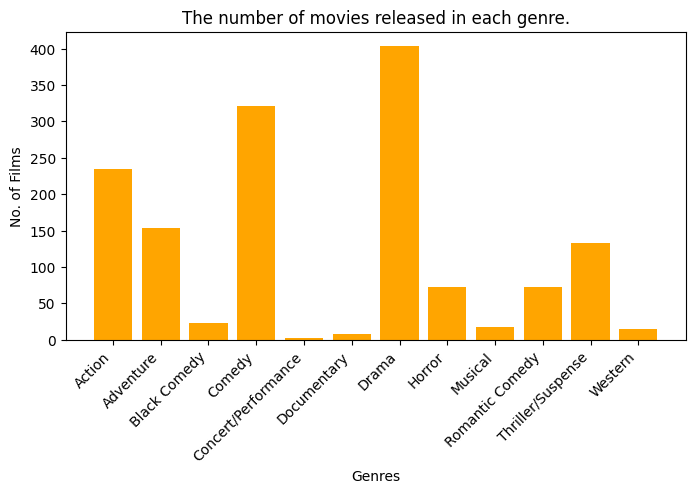

In [ ]:
mov_genre = movies.groupby(['Major Genre'])['Title'].nunique().reset_index()
plt.figure(figsize=(8,4))
plt.bar(mov_genre['Major Genre'],mov_genre['Title'],color='orange')
plt.xlabel('Genres')
plt.ylabel('No. of Films')
plt.title('The number of movies released in each genre.')
plt.xticks(rotation=45, ha='right')
plt.show()

###l. Show the no.of movies not rated under each genre in each fiction.

In [ ]:
not_rated = movies[(movies['MPAA Rating']=='Not Rated') & movies['Creative Type'].str.contains('Fiction')]
not_rated = not_rated.groupby(['Major Genre','Creative Type'])['Title'].nunique().reset_index()
pd.pivot_table(not_rated,index=['Major Genre','Creative Type'],values='Title')

Title
Major Genre Creative Type              
Comedy      Contemporary Fiction      2
Drama       Contemporary Fiction      1
            Historical Fiction        2